**Clustering Resources**

- https://neptune.ai/blog/clustering-algorithms

- https://www.kdnuggets.com/2019/10/right-clustering-algorithm.html

In [14]:
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [15]:
df_movie_metadata = pd.read_csv("movie_metadata.csv")
df_movies = pd.read_csv("movies.csv")
df_ratings = pd.read_csv("ratings.csv")

In [16]:
pd.set_option("display.max_columns", None)

In [17]:
df_movie_metadata.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [18]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [19]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [20]:
df_united = df_movies.merge(df_ratings, on="movieId")

In [21]:
print(f"""Unique movie number df 1 {len(df_united["title"].unique())}\
\nUnique movie number df 2 {len(df_movie_metadata["movie_title"].unique())}""")

Unique movie number df 1 9064
Unique movie number df 2 4917


In [22]:
df_united["movie_title_edited"] = [movie.split(" (")[0] for movie in df_united["title"]]
df_movie_metadata["movie_title_edited"] = df_movie_metadata["movie_title"].apply(lambda x: x.split("\xa0")[0]).values
df_new = df_united.merge(df_movie_metadata, how="right",on="movie_title_edited")

In [23]:
df_new.drop(["title","genres_x","genres_y","movie_imdb_link"], axis=1, inplace=True)
df_new.dropna(inplace=True)

In [24]:
print(f"""Unique user number = {len(df_new["userId"].unique())}""")

Unique user number = 671


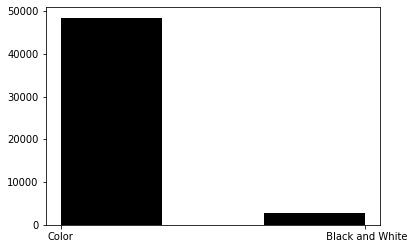

In [25]:
plt.hist(df_new["color"], bins=3, color="black")
plt.show()

In [26]:
df_new.groupby("color").mean()[["rating", "imdb_score"]]

,rating,imdb_score
color,,
Black and White,3.888109,8.003543
Color,3.497719,7.196745


In [27]:
df_new["rating"].max(), df_new["rating"].min() 

(5.0, 0.5)

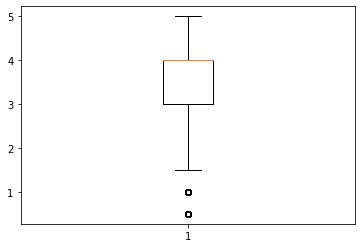

In [28]:
plt.boxplot(df_new["rating"])
plt.show()

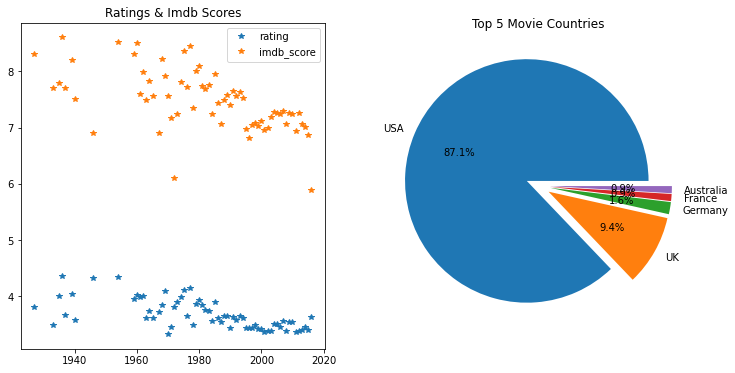

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
ax[0].plot(df_new.groupby("title_year").mean()[["rating","imdb_score"]],"*", label=["rating","imdb_score"])
ax[0].legend()
ax[0].set_title("Ratings & Imdb Scores")

explode_list = [0.1, 0.1, 0.1, 0.1, 0.1]
ax[1].pie(df_new["country"].value_counts()[:5], 
        labels=df_new["country"].value_counts().keys()[:5], explode=explode_list, autopct='%1.1f%%')
ax[1].set_title("Top 5 Movie Countries")

plt.show()

In [30]:
try:
    del(df_ratings)
    del(df_movies)
    del(df_united)
except:
    pass

___

**1-Clustering using Cast People**

In [31]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [32]:
from classes_functions import prepare_text_data
%load_ext autoreload
%autoreload 2

In [33]:
df_movie_metadata.dropna(inplace=True)

In [34]:
prepare_data = prepare_text_data(df_movie_metadata)
prepare_data.prepare_dataset()
prepare_data.return_lists()
prediction_data = prepare_data.final_predict_data()

In [35]:
inertia_list = []
silhouette_list = []
for k_val in tqdm(range(2,100)):
    model = KMeans(n_clusters=k_val)
    y_pred = model.fit_predict(prediction_data)
    silhouette_list.append(silhouette_score(prediction_data, model.labels_))
    inertia_list.append(model.inertia_)

100%|██████████| 98/98 [03:18<00:00,  2.02s/it]


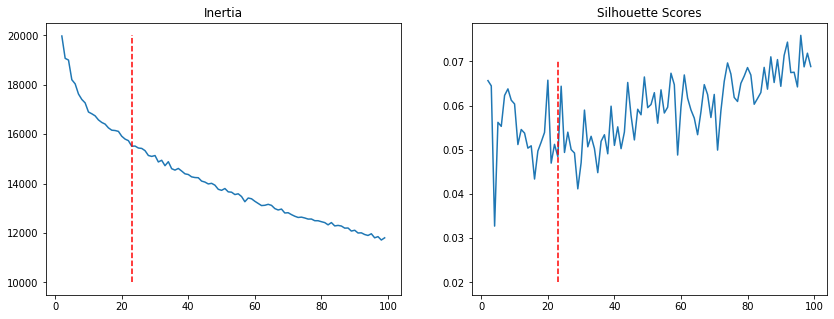

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(14,5))
# n_cluster = 23
ax[0].plot(range(2,100), inertia_list)
ax[0].plot([23]*2,[10000,20000], "--", color="red")
ax[0].set_title("Inertia")

ax[1].plot(range(2,100), silhouette_list)
ax[1].plot([23]*2,[0.02,0.07], "--", color="red")
ax[1].set_title("Silhouette Scores")

plt.show()

**Agglomerative Hierarchical Clustering**

In [37]:
from sklearn.cluster import AgglomerativeClustering

In [38]:
score_list = []
for i in tqdm(range(2,50)):
    agg_clustering = AgglomerativeClustering(n_clusters=i)
    y_pred = agg_clustering.fit_predict(prediction_data)
    score_list.append(silhouette_score(prediction_data, agg_clustering.labels_))

100%|██████████| 48/48 [01:17<00:00,  1.62s/it]


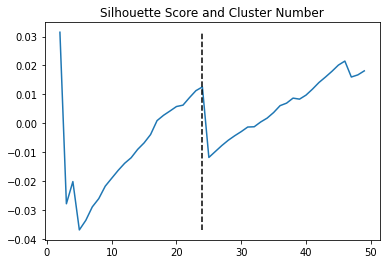

In [39]:
# n_cluster = 24
plt.plot(range(2,50), score_list)
plt.plot([24]*2, [min(score_list), max(score_list)], "--", color="black")
plt.title("Silhouette Score and Cluster Number")
plt.show()

**DBSCAN**

In [40]:
from sklearn.cluster import DBSCAN

In [41]:
score_list = []
for i in tqdm(range(2,25)):
    dbscan = DBSCAN(eps=0.25, min_samples=i)
    y_pred = dbscan.fit_predict(prediction_data)
    score_list.append(silhouette_score(prediction_data, dbscan.labels_))

100%|██████████| 23/23 [00:10<00:00,  2.16it/s]


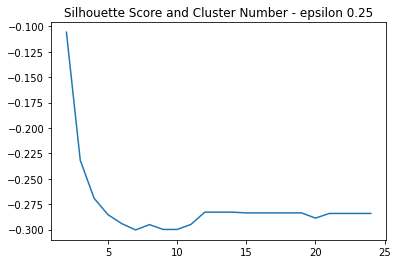

In [42]:
# min_samples = 5
plt.plot(range(2,25), score_list)
#plt.plot([24]*2, [min(score_list), max(score_list)], "--", color="black")
plt.title("Silhouette Score and Cluster Number - epsilon 0.25")
plt.show()

**Gaussian Mixture Models**

Check for normality because gmm models assume data has gaussian distribution

- https://towardsdatascience.com/normality-tests-in-python-31e04aa4f411

In [43]:
from scipy.stats import shapiro

In [44]:
stat, p = shapiro(prediction_data)
print("stat=%.3f, p=%.3f\n"%(stat, p))
if p > 0.05:
    print("Probably Gaussian")
else:
    print("Probably not Gaussian")

stat=0.120, p=0.000

Probably not Gaussian


Implementing GMM model

In [45]:
from sklearn.mixture import GaussianMixture

In [46]:
score_list = []
for i in tqdm(range(2,25)):
    gmm = GaussianMixture(n_components=i)
    y_pred = gmm.fit_predict(prediction_data)
    score_list.append(silhouette_score(prediction_data, y_pred))

100%|██████████| 23/23 [01:33<00:00,  4.07s/it]


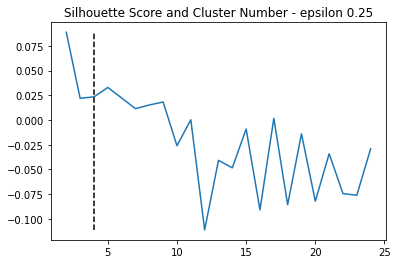

In [47]:
# n_components = 4
plt.plot(range(2,25), score_list)
plt.plot([4]*2, [min(score_list), max(score_list)], "--", color="black")
plt.title("Silhouette Score and Cluster Number - epsilon 0.25")
plt.show()

**Prediction with K-Means Clustering**

In [48]:
model = KMeans(n_clusters=23)
y_pred = model.fit_predict(prediction_data)
predicted_df = pd.DataFrame({"cluster":y_pred}, 
                            index=df_movie_metadata["movie_title_edited"])

In [49]:
def recommend_movie(name=None, recommend_number=2):
    if name in list(df_movie_metadata["movie_title_edited"]):
        cluster_number = predicted_df.loc["Avatar", "cluster"]
        movie_names_list = predicted_df[predicted_df.cluster==cluster_number].index.values
        recommend_df = df_new[df_new.movie_title_edited.isin(movie_names_list)].groupby("movie_title_edited").\
        mean()[["rating","imdb_score"]].reset_index().sort_values(["imdb_score","rating"], ascending=False)
        recommend_number = min(recommend_df.shape[0], recommend_number)
        print(recommend_df[:recommend_number]["movie_title_edited"].values)
    else:
        print("This film is not in my list")

For example I watched the Avatar and want some movies to watch extra.

In [50]:
recommend_movie("Avatar", recommend_number=5)

['Star Wars: Episode V - The Empire Strikes Back'
 'Star Wars: Episode IV - A New Hope' 'Princess Mononoke'
 'Star Wars: Episode VI - Return of the Jedi'
 'Monty Python and the Holy Grail']


**2-Clustering using AutoEncoder**

- https://towardsdatascience.com/credit-card-customer-clustering-with-autoencoder-and-k-means-16654d54e64e

- https://medium.com/@iampatricolee18/autoencoder-k-means-clustering-epl-players-by-their-career-statistics-f38e2ea6e375

In [51]:
from classes_functions import get_word_data, autoencoder, ClusteringLayer, target_distribution
from keras.initializers import VarianceScaling
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import SGD
from keras.models import Model
import numpy as np

In [52]:
training_samples = 800
validation_samples = 450

In [53]:
data = get_word_data(df_new["plot_keywords"])

4244 unique tokens found


In [54]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

In [55]:
n_clusters = 23
n_epochs = 8
batch_size = 128

In [56]:
dims = [data_scaled.shape[-1], 500, 500, 1000, 10] 
init = VarianceScaling(scale=1. / 3., mode='fan_in',
                           distribution='uniform')
pretrain_optimizer = "rmsprop" #SGD(lr=1, momentum=0.9)
pretrain_epochs = n_epochs

In [57]:
autoencoder, encoder = autoencoder(dims, init=init)

In [58]:
autoencoder.compile(optimizer=pretrain_optimizer, loss='binary_crossentropy')  #loss='mse'
autoencoder.fit(data_scaled, data_scaled, batch_size=batch_size, epochs=pretrain_epochs)

Epoch 1/8
401/401 [==============================] - 11s 26ms/step - loss: 0.0029
Epoch 2/8
401/401 [==============================] - 10s 26ms/step - loss: 0.0019
Epoch 3/8
401/401 [==============================] - 10s 26ms/step - loss: 0.0019
Epoch 4/8
401/401 [==============================] - 10s 26ms/step - loss: 0.0018
Epoch 5/8
401/401 [==============================] - 10s 26ms/step - loss: 0.0018
Epoch 6/8
401/401 [==============================] - 10s 26ms/step - loss: 0.0017
Epoch 7/8
401/401 [==============================] - 10s 26ms/step - loss: 0.0017
Epoch 8/8
401/401 [==============================] - 10s 26ms/step - loss: 0.0017


In [59]:
clustering_layer = ClusteringLayer(n_clusters, name='clustering')(encoder.output)
model = Model(inputs=encoder.input, outputs=clustering_layer)

In [60]:
model.compile(optimizer=SGD(0.01, 0.9), loss='kld') #(optimizer=SGD(0.01, 0.9), loss='kld')

In [61]:
encoder_pred = encoder.predict(data_scaled)

In [62]:
kmeans = KMeans(n_clusters=n_clusters, n_init=20)
y_pred = kmeans.fit_predict(encoder.predict(data_scaled))

In [63]:
y_pred_last = np.copy(y_pred)

In [64]:
model.get_layer(name='clustering').set_weights([kmeans.cluster_centers_])

In [65]:
loss = 0
index = 0
maxiter = 1000 # 8000
update_interval = 100 # 140
index_array = np.arange(data_scaled.shape[0])

In [66]:
tol = 0.001 # tolerance threshold to stop training

for ite in tqdm(range(int(maxiter))):
    if ite % update_interval == 0:
        q = model.predict(data_scaled, verbose=0)
        p = target_distribution(q)  # update the auxiliary target distribution p

    idx = index_array[index * batch_size: min((index+1) * batch_size, data_scaled.shape[0])]
    loss = model.train_on_batch(x=data_scaled[idx], y=p[idx])
    index = index + 1 if (index + 1) * batch_size <= data_scaled.shape[0] else 0


100%|██████████| 1000/1000 [00:52<00:00, 19.18it/s]


In [67]:
# Eval.
q = model.predict(data_scaled, verbose=0)
p = target_distribution(q)  # update the auxiliary target distribution p

# evaluate the clustering performance
y_pred = q.argmax(1)

In [68]:
df_new["cluster"] = y_pred

In [69]:
df_new.head()

,movieId,userId,rating,timestamp,movie_title_edited,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,cluster
0,72998.0,15.0,4.0,1.261944e+09,Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,1
1,72998.0,26.0,3.5,1.352598e+09,Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,1
2,72998.0,31.0,4.0,1.274150e+09,Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,1
3,72998.0,48.0,4.5,1.305606e+09,Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,1
4,72998.0,72.0,2.0,1.461784e+09,Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,1


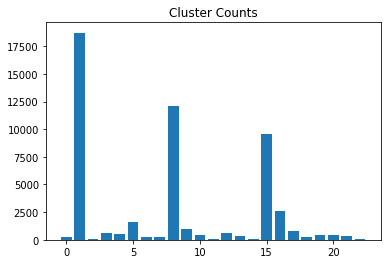

In [70]:
plt.bar(df_new["cluster"].value_counts().keys(), df_new["cluster"].value_counts().values)
plt.title("Cluster Counts")
plt.show()

In [71]:
# Recommend 

def recommend_movie(movie_name):
    cluster_number = df_new[df_new["movie_title_edited"]==movie_name]["cluster"].values[0]

    recommend_df = df_new[df_new.cluster==cluster_number].groupby("movie_title_edited").mean()
    recommend_df = recommend_df.sort_values(["imdb_score","rating"], ascending=False).reset_index()
    print(recommend_df[:5]["movie_title_edited"].values)

In [72]:
movie_name = "Avatar"
recommend_movie(movie_name)

["Schindler's List" 'Pulp Fiction'
 'Star Wars: Episode V - The Empire Strikes Back' 'Forrest Gump'
 'Inception']


In [73]:
movie_name = 'Madagascar: Escape 2 Africa'
recommend_movie(movie_name)

['Seven Samurai' 'Gladiator' 'Lawrence of Arabia'
 'Once Upon a Time in America' 'Princess Mononoke']


Some visualization on Clusters

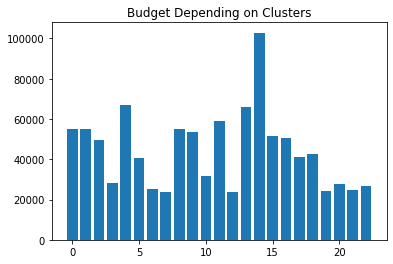

In [74]:
plt.bar((df_new.groupby("cluster").mean()["budget"]/1000).keys(),
       (df_new.groupby("cluster").mean()["budget"]/1000).values)
plt.title("Budget Depending on Clusters")
plt.show()

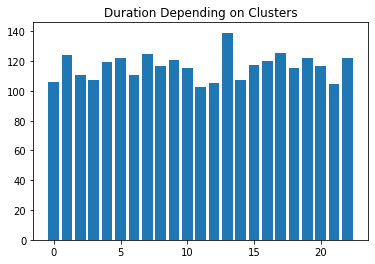

In [75]:
# Cluster 3 like to watch shorter movies.

plt.bar((df_new.groupby("cluster").mean()["duration"]).keys(),
       (df_new.groupby("cluster").mean()["duration"]).values)
plt.title("Duration Depending on Clusters")
plt.show()

___

**3-Clustering with CrossTab**

In [76]:
from sklearn.decomposition import PCA

In [77]:
print(f"""Minimum user rating = {df_new["rating"].min()}""")

Minimum user rating = 0.5


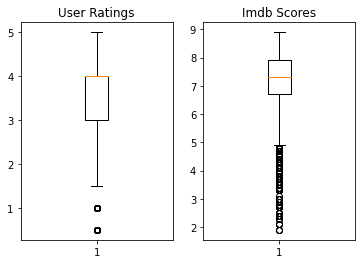

In [78]:
fig, ax = plt.subplots(1,2)
ax[0].boxplot(df_new["rating"])
ax[1].boxplot(df_new["imdb_score"])
ax[0].set_title("User Ratings")
ax[1].set_title("Imdb Scores")
plt.show()

In [79]:
user_movie_crosstab = pd.crosstab(df_new["userId"], df_new["movie_title_edited"])

In [80]:
user_movie_crosstab.head()

movie_title_edited  10 Cloverfield Lane  10 Things I Hate About You  \
userId                                                                
1.0                                   0                           0   
2.0                                   0                           0   
3.0                                   0                           0   
4.0                                   0                           0   
5.0                                   0                           0   

movie_title_edited  102 Dalmatians  12 Years a Slave  127 Hours  \
userId                                                            
1.0                              0                 0          0   
2.0                              0                 0          0   
3.0                              0                 0          0   
4.0                              0                 0          0   
5.0                              0                 0          0   

movie_title_edited  13 Going on 30  1408  15 Minutes  16 Blocks  17 Again  \
userId                                                                      
1.0                              0     0           0          0         0   
2.0                              0     0           0          0         0   
3.0                              0     0           0          0         0   
4.0                              0     0           0          0         0   
5.0                              0     0           0          0         0   

movie_title_edited  2 Fast 2 Furious  2 Guns  20 Dates  20 Feet from Stardom  \
userId                                                                         
1.0                                0       0         0                     0   
2.0                                0       0         0                     0   
3.0                                0       0         0                     0   
4.0                                0       0         0                     0   
5.0                                0       0         0                     0   

movie_title_edited  200 Cigarettes  2001: A Space Odyssey  2012  2046  21  \
userId                                                                      
1.0                              0                      0     0     0   0   
2.0                              0                      0     0     0   0   
3.0                              0                      0     0     0   0   
4.0                              0                      0     0     0   0   
5.0                              0                      0     0     0   0   

movie_title_edited  21 Grams  21 Jump Street  22 Jump Street  25th Hour  \
userId                                                                    
1.0                        0               0               0          0   
2.0                        0               0               0          0   
3.0                        0               0               0          0   
4.0                        0               0               0          0   
5.0                        0               0               0          0   

movie_title_edited  27 Dresses  28 Days  28 Weeks Later  3 Ninjas Kick Back  \
userId                                                                        
1.0                          0        0               0                   0   
2.0                          0        0               0                   0   
3.0                          0        0               0                   0   
4.0                          0        0               0                   0   
5.0                          0        0               0                   0   

movie_title_edited  30 Days of Night  30 Minutes or Less  300  \
userId                                                          
1.0                                0                   0    0   
2.0                                0                   0    0   
3.0                                0               

In [81]:
# user id 1, user watched 8 movies.
user_movie_crosstab[user_movie_crosstab.index==1].sum().sum()

8

Principal Component Analysis

to reduce dimension 


In [82]:
pca = PCA(n_components=3)
pca.fit(user_movie_crosstab)
pca_samples = pca.transform(user_movie_crosstab)

Clustering PCA implemented data

In [83]:

scores = []
inertia_list = []

for i in tqdm(range(2,50)):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(pca_samples)
    inertia_list.append(kmeans.inertia_)
    scores.append(silhouette_score(pca_samples, kmeans.labels_))

100%|██████████| 48/48 [00:10<00:00,  4.67it/s]


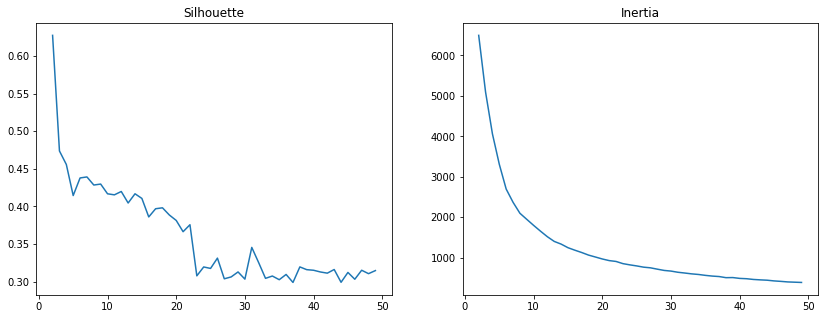

In [84]:
# Cluster 20 is good

fig, ax = plt.subplots(1,2, figsize=(14,5))
ax[0].plot(range(2,50), scores)
ax[1].plot(range(2,50), inertia_list)
ax[0].set_title("Silhouette")
ax[1].set_title("Inertia")
plt.show()

In [85]:
clusterer = KMeans(n_clusters=20,random_state=30, n_init=30).fit(pca_samples)
centers = clusterer.cluster_centers_
c_preds = clusterer.predict(pca_samples)

print(centers[:5])

[[ 7.14713666 -0.80502042  0.97121988]
 [-2.1242226   0.28179088 -0.44246183]
 [-0.7050689  -0.23968595 -0.11632573]
 [ 5.68485544  4.77861259  0.13731656]
 [19.907716    6.42874506  3.07848686]]


In [86]:
user_movie_crosstab['cluster'] = c_preds

In [87]:
cluster_0 = user_movie_crosstab[user_movie_crosstab['cluster']==0].drop('cluster',axis=1).sum()

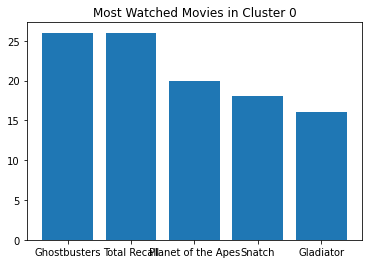

In [88]:
plt.bar(cluster_0.sort_values(ascending=False)[:5].keys(),
        cluster_0.sort_values(ascending=False)[:5].values)
plt.title("Most Watched Movies in Cluster 0")
plt.show()

In [89]:
def recommend_movies(movie_name):
    cluster_number = user_movie_crosstab.groupby("cluster").sum()[movie_name].argmax()
    columns = ["cluster"]+[movie_name]
    recommended_movies = user_movie_crosstab[user_movie_crosstab.cluster==cluster_number]
    recommended_movies = list(recommended_movies.drop(columns,axis=1).sum().sort_values(ascending=False)[:5].keys())
    print(recommended_movies)

In [90]:
recommend_movies("Ghostbusters")

['American Beauty', 'Raiders of the Lost Ark', 'Saving Private Ryan', 'Star Wars: Episode V - The Empire Strikes Back', 'Back to the Future']


**If you watch Ghostbusters movie then you can watch American Beauty, Raiders of the Lost Ark etc. Because users who watch Ghostbusters movie, most of them watch the movies in order.**

___

**4-Association Rules Mining**

- https://stackabuse.com/association-rule-mining-via-apriori-algorithm-in-python/

- https://medium.com/@mervetorkan/association-rules-with-python-9158974e761a

- https://www.veribilimiokulu.com/python-ile-birliktelik-kurallari-analizi-association-rules-analysis-with-python/

- https://analyticsindiamag.com/guide-to-association-rule-mining-from-scratch/

In [91]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [92]:
crosstab_df = pd.crosstab(df_new["userId"], df_new["movie_title_edited"])

In [93]:
records = []
for user in range(0,crosstab_df.shape[0]):
    records.append([i for i in crosstab_df.iloc[user,:].values*crosstab_df.columns if len(i)>0])

In [94]:
trans_encoder = TransactionEncoder()
trans_data = trans_encoder.fit(records).transform(records)
trans_df = pd.DataFrame(trans_data, columns=trans_encoder.columns_)
trans_df = trans_df.replace({False:0})
trans_df.head()

10 Cloverfield Lane 10 Things I Hate About You 102 Dalmatians  \
0                   0                          0              0   
1                   0                          0              0   
2                   0                          0              0   
3                   0                          0              0   
4                   0                          0              0   

  12 Years a Slave 127 Hours 13 Going on 30 1408 15 Minutes 16 Blocks  \
0                0         0              0    0          0         0   
1                0         0              0    0          0         0   
2                0         0              0    0          0         0   
3                0         0              0    0          0         0   
4                0         0              0    0          0         0   

  17 Again 2 Fast 2 Furious 2 Guns 20 Dates 20 Feet from Stardom  \
0        0                0      0        0                    0   
1        0                0      0        0                    0   
2        0                0      0        0                    0   
3        0                0      0        0                    0   
4        0                0      0        0                    0   

  200 Cigarettes 2001: A Space Odyssey 2012 2046 21 21 Grams 21 Jump Street  \
0              0                     0    0    0  0        0              0   
1              0                     0    0    0  0        0              0   
2              0                     0    0    0  0        0              0   
3              0                     0    0    0  0        0              0   
4              0                     0    0    0  0        0              0   

  22 Jump Street 25th Hour 27 Dresses 28 Days 28 Weeks Later  \
0              0         0          0       0              0   
1              0         0          0       0              0   
2              0         0          0       0              0   
3              0         0          0       0              0   
4              0         0          0       0              0   

  3 Ninjas Kick Back 30 Days of Night 30 Minutes or Less 300  \
0                  0                0                  0   0   
1                  0                0                  0   0   
2                  0                0                  0   0   
3                  0                0                  0   0   
4                  0                0                  0   0   

  3000 Miles to Graceland 300: Rise of an Empire 3:10 to Yuma  \
0                       0                      0            0   
1                       0                      0            0   
2                       0                      0            0   
3                       0                      0            0   
4                       0                      0            0   

  4 Months, 3 Weeks and 2 Days 40 Days and 40 Nights 42 42nd Street 47 Ronin  \
0                            0                     0  0           0        0   
1                            0                     0  0           0        0   
2                            0                     0  0           0        0   
3                            0                     0  0           0        0   
4                            0                     0  0           0        0   

  50 First Dates 50/50 54 8 Heads in a Duffel Bag 8 Mile 8 Women 88 Minutes  \
0              0     0  0                       0      0       0          0   
1              0     0  0                       0      0       0          0   
2              0     0  0                       0      0       0          0   
3              0     0  0                       0      0       0          0   
4              0     0  0                       0      0       0          0   

  8MM  9 99 A Home at the End of the World A Million Ways to Die in the West  \
0   0  0  0                              0                                 0   

In [95]:
trans_df = apriori(trans_df, min_support = 0.2, use_colnames = True, verbose = 1)
trans_df

Processing 248 combinations | Sampling itemset size 4


,support,itemsets
0,0.260805,(Ace Ventura: Pet Detective)
1,0.320417,(Aladdin)
2,0.327869,(American Beauty)
3,0.298063,(Apollo 13)
4,0.220566,(Babe)
...,...,...
131,0.213115,"(Forrest Gump, Pulp Fiction, Schindler's List)"
132,0.208644,"(Terminator 2: Judgment Day, Forrest Gump, Pul..."
133,0.216095,"(Forrest Gump, Star Wars: Episode IV - A New H..."
134,0.230999,(Star Wars: Episode V - The Empire Strikes Bac...


In [96]:
df_ar = association_rules(trans_df, metric = "confidence", min_threshold = 0.6)
df_ar 

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Ace Ventura: Pet Detective),(Forrest Gump),0.260805,0.508197,0.213115,0.817143,1.607926,0.080575,2.689549
1,(Ace Ventura: Pet Detective),(Jurassic Park),0.260805,0.408346,0.205663,0.788571,1.931137,0.099165,2.798365
2,(Ace Ventura: Pet Detective),(Pulp Fiction),0.260805,0.482861,0.208644,0.800000,1.656790,0.082711,2.585693
3,(Aladdin),(Forrest Gump),0.320417,0.508197,0.251863,0.786047,1.546737,0.089028,2.298646
4,(Aladdin),(Jurassic Park),0.320417,0.408346,0.228018,0.711628,1.742709,0.097177,2.051704
...,...,...,...,...,...,...,...,...,...
141,"(Star Wars: Episode VI - Return of the Jedi, S...",(Star Wars: Episode IV - A New Hope),0.251863,0.433681,0.238450,0.946746,2.183046,0.129222,10.634211
142,"(Star Wars: Episode IV - A New Hope, Star Wars...",(Star Wars: Episode VI - Return of the Jedi),0.302534,0.323398,0.238450,0.788177,2.437175,0.140611,3.194191
143,"(Star Wars: Episode VI - Return of the Jedi, S...",(Star Wars: Episode V - The Empire Strikes Back),0.278689,0.348733,0.238450,0.855615,2.453494,0.141262,4.510625
144,(Star Wars: Episode V - The Empire Strikes Back),"(Star Wars: Episode VI - Return of the Jedi, S...",0.348733,0.278689,0.238450,0.683761,2.453494,0.141262,2.280904


In [97]:
df_ar.loc[0]

antecedents           (Ace Ventura: Pet Detective)
consequents                         (Forrest Gump)
antecedent support                        0.260805
consequent support                        0.508197
support                                   0.213115
confidence                                0.817143
lift                                      1.607926
leverage                                  0.080575
conviction                                2.689549
Name: 0, dtype: object

In [ ]:
# %26 of people watched Ace Ventura: Pet Detective movie (antecedent support)
# %50 of people watched Forrest Gump (consequent support)
# %21 of people watched both of them (support)
# %81 of people who watched Ace Ventura also watched Forrest Gump (confidence)
# The people who watched them both is %8 more than who watched them separately (leverage)
# The rate of the movies related each other is 2.68 (conviction)